# Import Packages, Functions and Data

In [1]:
import titanlib
import geopandas
import pandas as pd
import netCDF4
import numpy as np

from mpl_toolkits.axes_grid1 import make_axes_locatable
import datetime
import time

# Import Formatted Data and functions from other Python script
from Data_Importation_and_Function_Definition import ROI_counties, NI_counties, rain_wow, rain_wow_hourly_obs, temp_wow, rain_official, temp_official, isolate_data_of_interest, plot_wow_data

%matplotlib inline

Note: As advised, the Official Rainfall Rate column is currently beign set as equal to the 
Rainfall Accumulation Hourly column


# Obtain Test Data

In [2]:
gdf_temp_wow, gdf_temp_official, gdf_temp_combined = isolate_data_of_interest(day_of_interest="15", 
                                                                              month_of_interest="05",
                                                                              year_of_interest="2021", 
                                                                              time_of_interest="10",
                                                                              type_of_data="Temperature", 
                                                                              add_elevation_bool=True,
                                                                              remove_missing_val=True, 
                                                                              cols_to_remove_missing_val=["Air Temperature"])

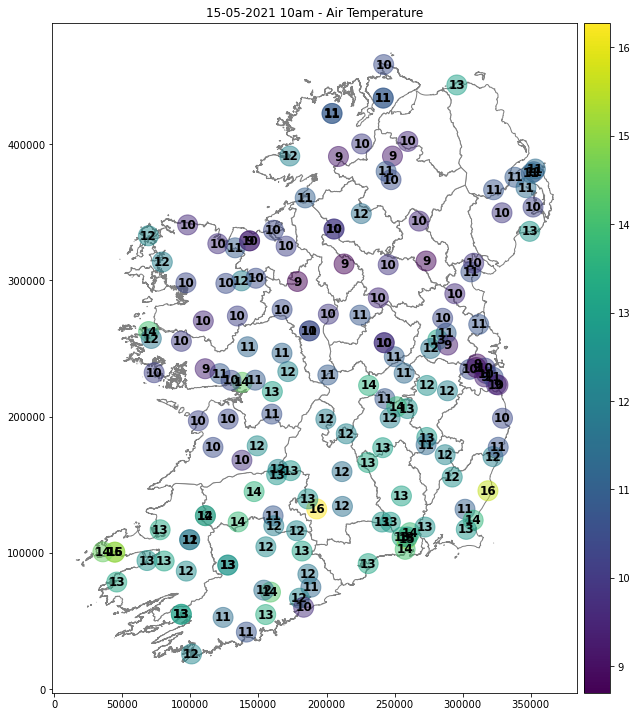

In [3]:
plot_wow_data(gdf_of_interest = gdf_temp_combined, type_of_plot = "Air Temperature", 
              buffer_val = 0, flags = None)

# Isolation Check

In [4]:
long_np = np.array(gdf_temp_combined["Longitude"])
lat_np = np.array(gdf_temp_combined["Latitude"])

points = titanlib.Points(lat_np, long_np)

In [5]:
radius = 20000 # Radius around each station to check
num_min = 3 # Minimum number of neighbours

radius2 = 30000
num_min2 = 1

flags = titanlib.isolation_check(points, num_min, radius) # more strict requirements
flags2 = titanlib.isolation_check(points, num_min2, radius2) # very lenient requirements

print("Flags from more strict requirements:\n")
print(flags)
print("\n\nFlags from very lenient requirements:\n")
print(flags2)

Flags from more strict requirements:

[1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0
 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1]


Flags from very lenient requirements:

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


red: Stations that have been flagged as bad


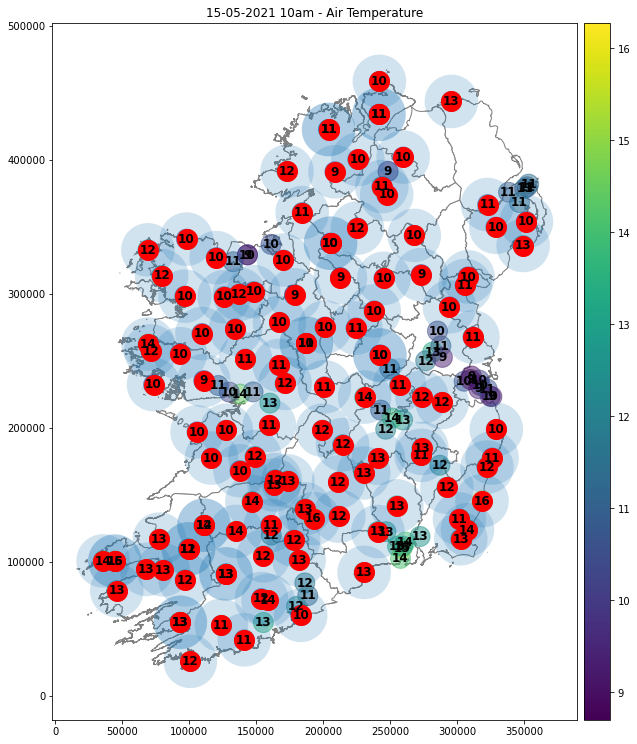

In [6]:
buffer_val_list = np.zeros(len(gdf_temp_combined), dtype = int)
indices = [i for i, x in enumerate(flags) if x == 1]
buffer_val_list[indices] = radius
buffer_val_list = list(buffer_val_list)

plot_wow_data(gdf_of_interest = gdf_temp_combined, type_of_plot = "Air Temperature", 
              buffer_val = buffer_val_list, flags = flags)

red: Stations that have been flagged as bad


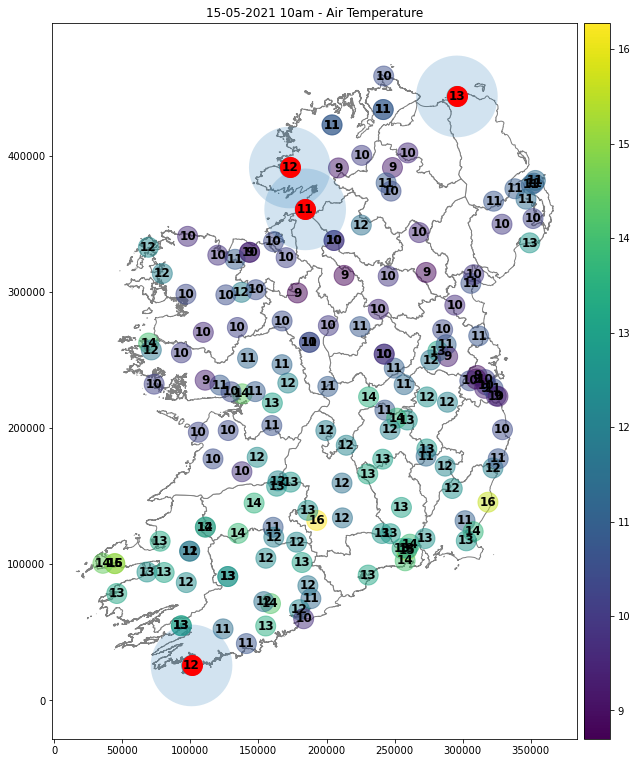

In [7]:
buffer_val_list = np.zeros(len(gdf_temp_combined), dtype = int)
indices = [i for i, x in enumerate(flags2) if x == 1]
buffer_val_list[indices] = radius2
buffer_val_list = list(buffer_val_list)

plot_wow_data(gdf_of_interest = gdf_temp_combined, type_of_plot = "Air Temperature", 
              buffer_val = buffer_val_list, flags = flags2)